In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import os.path
df = pd.read_csv("results/still_lifes_all_4_43.csv")

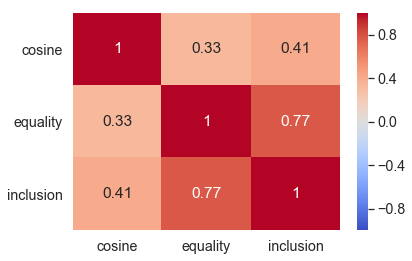

In [137]:
import matplotlib.pyplot as plt
df['patper'] = df['pattern'] + ' ' + df['perturbation']
df['patmea'] = df['pattern'] + ' ' + df['measure']
import seaborn as sns
df['perturbation'] = df['perturbation'].replace('add_one_cell_perimeter', 'add one')
df['perturbation'] = df['perturbation'].replace('add_two_cells_perimeter', 'add two')
df['perturbation'] = df['perturbation'].replace('subtract_one_cell', 'sub one')
df['perturbation'] = df['perturbation'].replace('subtract_two_cells', 'sub two')
sns.set(font_scale=1.3)

corr1 = df.pivot('patper', 'measure', 'resilience').corr()

sns.heatmap(corr1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);
#corr2 = df.pivot('patmea', 'perturbation', 'resilience').corr()
#sns.heatmap(corr2,
#            vmin=-1,
#            vmax=1,
#            cmap='coolwarm',
#            annot=True);
plt.yticks(rotation=0)
plt.ylabel('')
plt.xlabel('')
plt.savefig('figures/measures_corr.pdf', bbox_inches='tight')

In [4]:
def map_measure_perturbation(df, f_map):
    measures = df['measure'].unique()
    perturbations = df['perturbation'].unique()
    for measure in measures:
        for perturbation in perturbations:
            df2 = df[(df['measure'] == measure) & (df['perturbation'] == perturbation)]
            f_map(df2, measure,  perturbation)

In [20]:
ranked_df = df.copy()
def add_rank(df, measure, perturbation):
    ranked_df.loc[df.index,'rank'] = df['resilience'].rank(method='min', ascending=False)
map_measure_perturbation(df, add_rank)

In [30]:
ranked_df[(df['pattern'] == 'xs32_4a9b8b96z259d1d96')].sort_values(['perturbation','measure'], ascending=False).round(2)


Unnamed: 0    measure                 pattern  \
1894978     1894978  inclusion  xs32_4a9b8b96z259d1d96   
1894977     1894977   equality  xs32_4a9b8b96z259d1d96   
1894979     1894979     cosine  xs32_4a9b8b96z259d1d96   
1894972     1894972  inclusion  xs32_4a9b8b96z259d1d96   
1894971     1894971   equality  xs32_4a9b8b96z259d1d96   
1894973     1894973     cosine  xs32_4a9b8b96z259d1d96   
1894975     1894975  inclusion  xs32_4a9b8b96z259d1d96   
1894974     1894974   equality  xs32_4a9b8b96z259d1d96   
1894976     1894976     cosine  xs32_4a9b8b96z259d1d96   
1894969     1894969  inclusion  xs32_4a9b8b96z259d1d96   
1894968     1894968   equality  xs32_4a9b8b96z259d1d96   
1894970     1894970     cosine  xs32_4a9b8b96z259d1d96   

                    perturbation  population  resilience      rank  
1894978       subtract_two_cells          32        0.00      76.0  
1894977       subtract_two_cells          32        0.00      76.0  
1894979       subtract_two_cells          32        0.08  117270.0  
1894972        subtract_one_cell          32        0.00   39714.0  
1894971        subtract_one_cell          32        0.00   39637.0  
1894973        subtract_one_cell          32        0.07  140483.0  
1894975  add_two_cells_perimeter          32        0.00   18732.0  
1894974  add_two_cells_perimeter          32        0.00    1220.0  
1894976  add_two_cells_perimeter          32        0.08  107675.0  
1894969   add_one_cell_perimeter          32        0.21     262.0  
1894968   add_one_cell_perimeter          32        0.21       1.0  
1894970   add_one_cell_perimeter          32        0.27    2027.0

In [39]:
def print_len(df, m, p):
    print(len(df))
map_measure_perturbation(df, print_len)

159100
159100
159100
159100
159100
159100
159100
159100
159100
159100
159100
159100


add_one_cell_perimeter
subtract_one_cell
add_two_cells_perimeter
subtract_two_cells
add_one_cell_perimeter
subtract_one_cell
add_two_cells_perimeter
subtract_two_cells
add_one_cell_perimeter
subtract_one_cell
add_two_cells_perimeter
subtract_two_cells


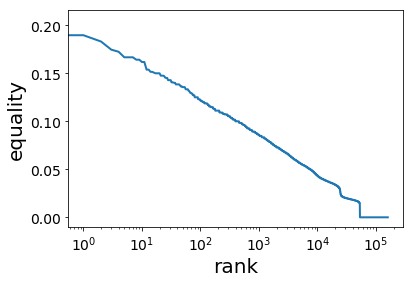

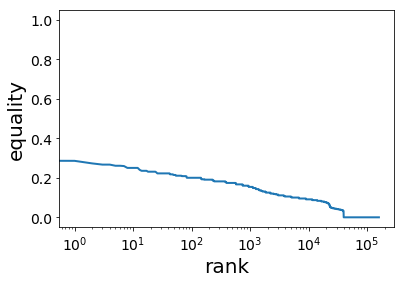

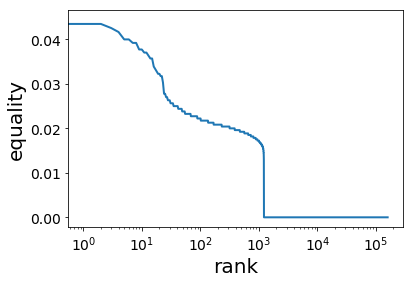

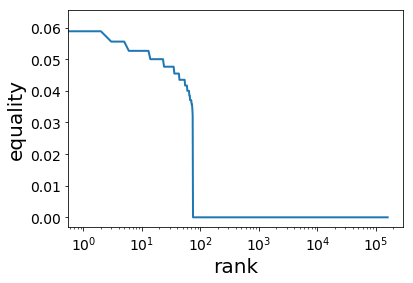

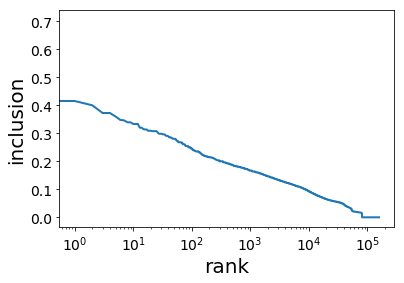

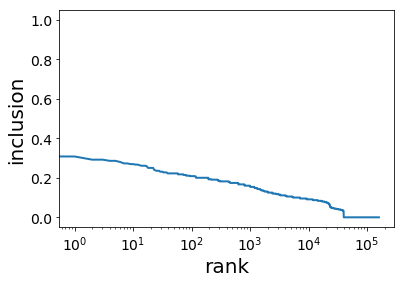

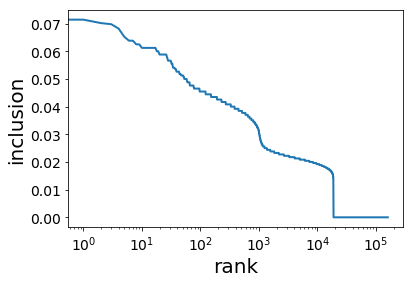

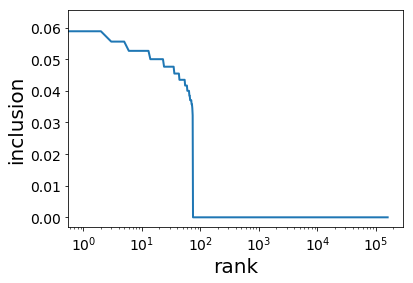

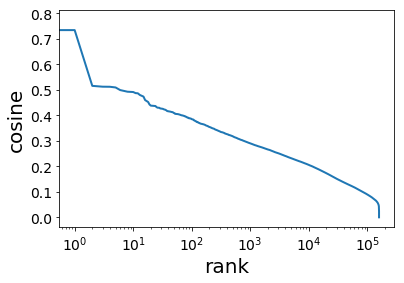

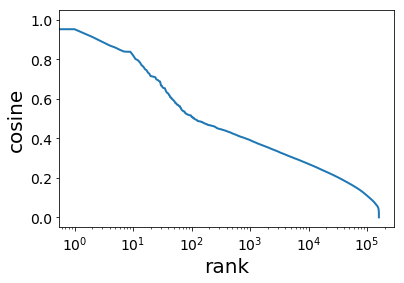

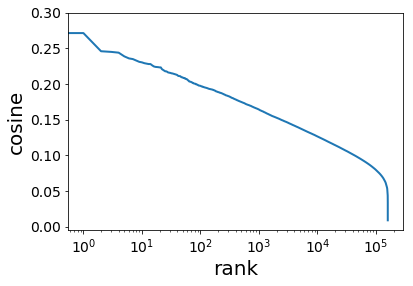

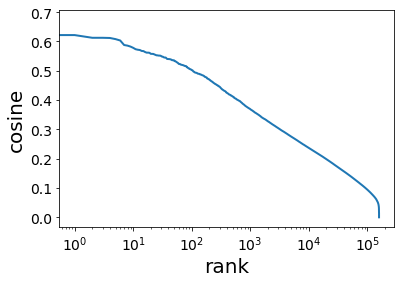

In [7]:
def plot_resilience_histogram(df, measure, perturbation):
    #df.hist('resilience', log=True)
    plt.figure()
    y = df['resilience'].sort_values(ascending=False).to_numpy()
    plt.plot(y, lw=2)
    plt.xscale('log')
    plt.xlabel('rank', fontsize=20)
    plt.xticks(fontsize=14)
    plt.ylabel(measure, fontsize=20)
    plt.yticks(fontsize=14)
    print(perturbation)
    plt.savefig(f'figures/resilience-distribution-{perturbation}-{measure}.pdf', bbox_inches='tight')
    
map_measure_perturbation(df, plot_resilience_histogram)

Most resilient to add_one_cell_perimeter
under equality (0.21): xs32_4a9b8b96z259d1d96


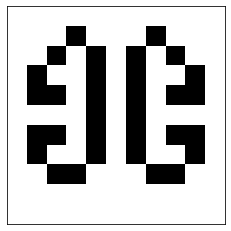

Most resilient to subtract_one_cell
under equality (1.00): xs4_33


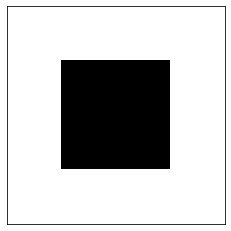

Most resilient to add_two_cells_perimeter
under equality (0.04): xs22_0iu0u93z643032


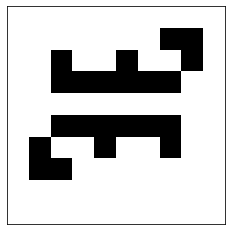

Most resilient to subtract_two_cells
under equality (0.06): xs18_c89n871z311


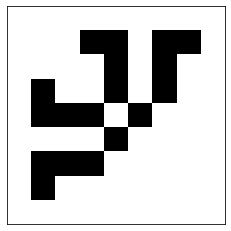

Most resilient to add_one_cell_perimeter
under inclusion (0.71): xs4_252


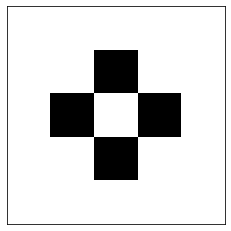

Most resilient to subtract_one_cell
under inclusion (1.00): xs4_33


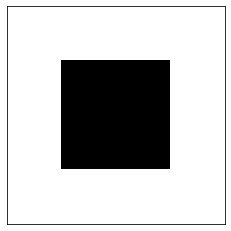

Most resilient to add_two_cells_perimeter
under inclusion (0.07): xs18_8o1vg352z23


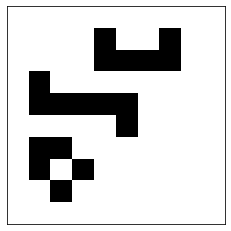

Most resilient to subtract_two_cells
under inclusion (0.06): xs18_c89n871z311


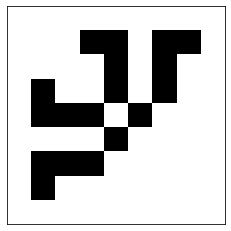

Most resilient to add_one_cell_perimeter
under cosine (0.78): xs4_252


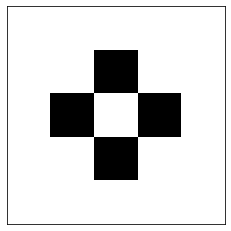

Most resilient to subtract_one_cell
under cosine (1.00): xs4_33


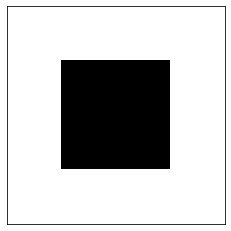

Most resilient to add_two_cells_perimeter
under cosine (0.29): xs16_9f0330f9


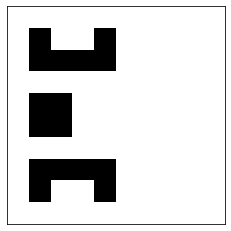

Most resilient to subtract_two_cells
under cosine (0.67): xs7_25ac


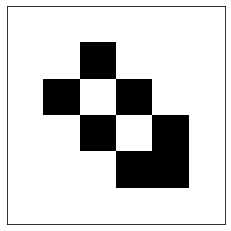

In [9]:
import shape2png
def top_patterns_resilience(df, measure, perturbation):
    top_row = df.nlargest(1, 'resilience')
    top_pattern = top_row['pattern'].iloc[0]
    top_resilience = top_row['resilience'].iloc[0]
    plt.figure()
    #plt.title(f'Most resilient to {perturbation}\nunder {measure} ({top_resilience:0.2f})')
    print(f'Most resilient to {perturbation}\nunder {measure} ({top_resilience:0.2f}): {top_pattern}')
    shape2png.shape2png(top_pattern, f'figures/{top_pattern}.pdf')#f'figures/most_resilient_{perturbation}-{measure}.pdf')
    plt.show()
map_measure_perturbation(df, top_patterns_resilience)

In [31]:
df_add1_eq = df[(df['perturbation']=='add_one_cell_perimeter')&(df['measure']=='equality')]
df_sub1_eq = df[(df['perturbation']=='subtract_one_cell')&(df['measure']=='equality')]
df_merged = pd.merge(df_add1_eq, df_sub1_eq, on='pattern')

Unnamed: 0_x measure_x                 pattern  \
155782       1869384  equality   xs30_gbb88bbgz0dd11dd   
157914       1894968  equality  xs32_4a9b8b96z259d1d96   
135671       1628052  equality   xs26_660u1u0ooz330343   

                perturbation_x  population_x  resilience_x  rank_x  \
155782  add_one_cell_perimeter            30      0.062500  3544.0   
157914  add_one_cell_perimeter            32      0.205882     1.0   
135671  add_one_cell_perimeter            26      0.071429  2184.0   

        Unnamed: 0_y measure_y     perturbation_y  population_y  resilience_y  \
155782       1869387  equality  subtract_one_cell            30      0.266667   
157914       1894971  equality  subtract_one_cell            32      0.000000   
135671       1628055  equality  subtract_one_cell            26      0.230769   

         rank_y  comb_rank  
155782      4.0   -14176.0  
157914  39637.0   -39637.0  
135671     19.0   -41496.0

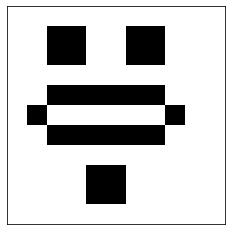

In [29]:
import shape2png
df_merged['comb_resilience'] = df_merged['resilience_x'] * df_merged['resilience_y']
comb_largest = df_merged.nlargest(3, 'comb_resilience')
for pattern in comb_largest['pattern']:
    shape2png.shape2png(pattern, f'figures/{pattern}.pdf')
comb_largest

In [20]:
df[['measure', 'pattern', 'perturbation', 'population', 'perimeter', 'resilience']].to_csv('results/overall_results.csv')